## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Необходимо изучить рынок российского кинопроката и выявить текущие тренды; уделить внимание фильмам, которые получили государственную поддержку; ответить на вопрос, насколько такие фильмы интересны зрителю.
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск, данные опубликованны на портале открытых данных Министерства культуры.

In [2]:
# датафрейм с данными о прокатных удостоверениях
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [3]:
# mkrf_shows - датафрейм с данными о прокатах в российских кинотеатрах
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

<div class="alert alert-block alert-info">Необходимо объединить два датафрейса по столбцу <b>puNumber</b>, однако этот столбец имеет тип данных <i>int64</i> в mkrf_shows и <i>object</i> в mkrf_movies. Если тип <i>int64</i> не вызывает беспокойств, то тип  <i>object</i> может содержать какие угодно строковые значения, как цифры, так и символы. 
</div>

In [4]:
# найдем в списке уникальных значений для столбца puNumber те значения, которые содержат не только цифры
for num in mkrf_movies['puNumber'].unique():
    if num.isalpha():
        print(f'Нецифровое значение:"{num}"')

Нецифровое значение:"нет"


<div class="alert alert-block alert-info">Преобразуем "нет" - в 0, а остальные значения -  в тип <i>int64</i></div>

In [5]:
# замена значения "нет" на нуль
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет'] = 0

# замена строковых значений на тип int64 для совпадения типа столбцов в двух датафреймах
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

<div class="alert alert-block alert-info">Объединим датафреймы mkrf_movies и mkrf_shows в новый датафрейм data и выведем последние 5 строчек</div>

In [6]:
data = mkrf_movies.merge(mkrf_shows, how='left')
data.tail(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


<div class="alert alert-block alert-info"><b>Вывод :</b>
    <p>Файлы с данными были объединены в датафрейм data по полю puNumber, который был приведен к одинаковому типу в разных датасетах

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

<div class="alert alert-block alert-info">Вывод основной информации о датафрейме data (использование метода info()) </div>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    float64
 10  nonrefundable_support  333 non-null    float64
 11  budget                 333 non-null    float64
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

<div class="alert alert-block alert-info">В столбце <b>show_start_date</b> преобразуем дату в формат '%Y-%m-%d'
<p>Столбцы <b>refundable_suppor, nonrefundable_support, budget, box_office</b> - выразим в млн. рублей</div>

In [8]:
# преобразование столбца show_start_date в формат '%Y-%m-%d'
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.date
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

# столбцы, содержащие денежные значения, выразим в млн. руб.
data['refundable_support'] = data['refundable_support'] / 1_000_000
data['nonrefundable_support'] = data['nonrefundable_support'] / 1_000_000
data['budget'] = data['budget'] / 1_000_000
data['box_office'] = data['box_office'] / 1_000_000

# замена буквы ё на е
data['title'] = data['title'].str.replace('ё', 'е')
data['director'] = data['director'].str.replace('ё', 'е')
data['film_studio'] = data['film_studio'].str.replace('ё', 'е')
data['producer'] = data['producer'].str.replace('ё', 'е')
data['production_country'] = data['production_country'].str.replace('ё', 'е')

<div class="alert alert-block alert-info">В столбце <b>'ratings'</b> тип данных object преобразуем во float64, однако там есть аномальные значения, например, '99%', удалим знак % и значения, большие 10 разделим на 10</div>

In [9]:
# список уникальных значений в столбце 'ratings"
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', 0, '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [10]:
# замена  % на ничего
data['ratings'] = data['ratings'].str.replace('%', '')

In [12]:
# описательная статистика для оценки возможных значений рейтинга в столбце
data['ratings'].describe()

count   6519.000
mean       6.488
std        1.115
min        1.000
25%        5.900
50%        6.600
75%        7.200
max        9.900
Name: ratings, dtype: float64

<div class="alert alert-block alert-info">Посмотрим на уникальные значения столбца <b>age_restriction</b> </div>

In [13]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории', 0], dtype=object)

In [14]:
# выведем строку с нулевым значением и обнаружим аномалию - строку с множеством пропущенных данных
data.query('age_restriction == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,NaN,0,1970-01-01,0,NaN,NaN,NaN,NaN,0,0.000,0.000,0.000,0,NaN,0,NaN


In [15]:
# удаление строки с индексом 1797 из датафрейма
data = data.drop(index=[1797])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

<div class="alert alert-block alert-info">Заполнение пропусков в столбце <b>production_country</b></div>

In [16]:
# вывод пропущенных значений в столбце production_country
data.loc[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия",0.195
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN


<div class="alert alert-block alert-info">Поскольку пропущенных значений всего два, можно заполнить без сопоставления различных полей, воспользовавшись поисковой системой. Детский юмористический киножурнал "Ералаш" - Россия, Мульт личности. Выпуск 5 - Россия</div>

In [17]:
# заполнение пропусков столбце production_country
data.loc[data['production_country'].isna(), 'production_country'] = 'Россия'

<hr>

<div class="alert alert-block alert-info">Заполнение пропусков в столбце <b>director, producer</b>. Пропущенные значения заменим на 'unknown'</div>

In [18]:
data['director'] = data['director'].fillna('unknown')
data['producer'] = data['producer'].fillna('unknown')
data['film_studio'] = data['film_studio'].fillna('unknown')
data['genres'] = data['genres'].fillna('unknown')

<hr>

<div class="alert alert-block alert-info">Заполнение пропусков в столбце <b>ratings</b> - в разделе 2.6, когда появится возможность сгруппировать типы фильмов и найти медианный рейтинг</div>

<div class="alert alert-block alert-info">
    <p>Пропуски были(или будут) заполнены в следующих столбцах:
        <li>production_country (вручную)
         <li>director, producer, genres - замена на unknown
         <li>ratings - медианным значением по жанрам на шаге 2.6
    <p>Пропуски не были заполнены в следующих столбцах:
        <li>ratings - субъективный признак
               <li>box_office - фильм мог не выходить в широкий прокат
        <li> refundable_support, nonrefundable_support, budget, financing_source - заполнены только для фильмов с господдержкой	

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

<div class="alert alert-block alert-info">Проверка столбца <b>type</b> на дубликаты. Есть неявный дубликат из-за лишних пробелов в начале строки (обработка таких случаев будет в разделе) 2.4</div>

In [19]:
data['type'].value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

<div class="alert alert-block alert-info">Проверка столбца <b>title</b> на дубликаты</div>

In [20]:
data['title'].value_counts().head(10)

День святого Валентина_                             5
Рапунцель: Запутанная история                       4
Не брать живым /По книге Раджива Чандрасекарана/    4
Робин Гуд (Robin Hood)                              4
Красавчик-2                                         4
Прощание                                            4
Код доступа "Кейптаун"                              4
Двойной копец                                       4
Непокоренный.                                       4
Белоснежка и охотник                                4
Name: title, dtype: int64

In [21]:
# общее количество дубликатов
data['title'].value_counts().sum()

7485

<div class="alert alert-block alert-info">Видно, что встречается множество дубликатов, но и еще различные символы в конце строк. Применим функцию del_last_symbol, которая удалит пробелы в начале / конце строки и специальные символы </div>

In [22]:
# функция преобразования строки: удаление пробелов в начале / конце, удаление спец. символов в конце строки
def del_last_symbol (title):
    marks = '''-[]{};?@#$%:'"\,./^&amp;*_'''
    title = title.strip()
    if title[-1] in marks:
        return title[:-1]
    else:
        return title
    
    
# применение функции к столбцу title
data['title'] = data['title'].apply(del_last_symbol)

<div class="alert alert-block alert-info">Теперь необходимо разобраться с дубликатами, решить, какие строки дублируются и почему такое могло произойти. 
    <p>Например, выведем все фильмы с названием "Волшебная страна". Несмотря на разные puNumber, фильмы 936 и 937, 107 и 4653 - явные дубликаты (хотя даты премьер у них разные), а фильм 2120 - просто совпадает по названию.
<p>Возможная причина дубликатов: <i>у фильма могла закончиться лицензия на озвучивание и перевод, и его переозвучили и запустили в прокат снова под другой премьерной датой</i> </div>

In [23]:
data.query('title == "Волшебная страна"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
107,Волшебная страна,221004716,2016-02-09,Художественный,Филм Колони,США,Марк Форстер,Ричард Н.Глэдстин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.900,"драма,семейный,биография",NaN
936,Волшебная страна,124003016,2016-06-07,Анимационный,"Брейктру Филмз, Эс Эм Бэ Инвестментс",Великобритания - Польша - КНР - Индия - Норвегия,"Мартин Клэпп, Дорота Кобеля, Джофф Линдси","Магдалена Баргел, Хью Велчман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.900,"драма,семейный,биография",0.004
937,Волшебная страна,124001113,2013-04-15,Анимационный,"Брейктру Филмз, Эс Эм Бэ Инвестментс",Великобритания - Польша - КНР - Индия - Норвегия,"Мартин Клэпп, Дорота Кобеля, Джофф Линдси","Магдалена Баргел, Хью Велчман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.900,"драма,семейный,биография",0.020
2120,Волшебная страна,124000515,2015-02-05,Анимационный,Чжэцзян Чжунгнань Анимэйшн,КНР,Фанг Лей,Ву Янронг,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.900,"драма,семейный,биография",1.171
4653,Волшебная страна,221155710,2010-12-17,Художественный,Филм Колони,США,Марк Форстер,Ричард Н.Глэдстин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.900,"драма,семейный,биография",NaN


<div class="alert alert-block alert-info">Удалим для начала дубликаты по совпадающим полям 'title', 'type', 'production_country', 'producer','short_age_restriction', 'box_office' </div>

In [24]:
data = data.drop_duplicates(subset=['title', 'type', 'production_country', \
                                    'producer','age_restriction', 'box_office']).reset_index(drop=True)

In [25]:
# общее количество дубликатов
data['title'].value_counts().sum()

6991

<div class="alert alert-block alert-info">Было удалено 6,6% данных-дубликатов, но чтобы продолжить обработку дубликатов по этому столбцу, необходимо проверить другие столбцы на неявные дубликаты и ошибки в заполнении данных </div>

<hr>

<div class="alert alert-block alert-info">Проверка столбца <b>puNumber</b> на дубликаты</div>

In [26]:
len(data['puNumber']) - len(data['puNumber'].drop_duplicates())


0

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

<div class="alert alert-block alert-info">Обработка столбцов 'type', 'film_studio', 'production_country', 'director', 'producer', 'genres'  - удаление пробелов в начале / конце строк</div>

In [27]:
# список столбцов для обработки
list_strip = ['type', 'film_studio', 'production_country', 'director', 'producer', 'genres']
# цикл обработки строк по удалению лишних пробелов
for el in list_strip:
    data[el] = data[el].str.strip()

<div class="alert alert-block alert-info">Обработка столбца 'production_country' на неявне дубликаты</div>

In [28]:
# количество дубликатов до обработки
len(data['production_country'].unique())

934

In [29]:
data['production_country'] = data['production_country'].str.replace(" ","")
data['production_country'] = data['production_country'].str.replace(",","-")
data['production_country'] = data['production_country'].str.lower()
sorted(data['production_country'].unique())


['2019',
 'cша',
 'австралия',
 'австралия-великобритания',
 'австралия-великобритания-бельгия-индия',
 'австралия-германия',
 'австралия-ирландия',
 'австралия-канада',
 'австралия-колумбия',
 'австралия-сша',
 'австралия-турция-сша',
 'австрия',
 'австрия-великобритания-германия',
 'австрия-германия',
 'австрия-германия-франция',
 'австрия-люксембург',
 'австрия-франция-германия',
 'азербайджан-россия',
 'аргентина',
 'аргентина-бразилия',
 'аргентина-испания',
 'аргентина-испания-уругвай',
 'аргентина-мексика-бразилия-франция-сша',
 'аргентина-уругвай-россия-германия-франция-нидерланды',
 'аргентина-франция-испания',
 'армения',
 'армения-германия',
 'армения-казахстан',
 'армения-россия',
 'бельгия',
 'бельгия-великобритания-сша',
 'бельгия-германия-канада-франция-сша-великобритания',
 'бельгия-германия-люксембург',
 'бельгия-германия-люксембург-франция',
 'бельгия-испания-канада-нидерланды',
 'бельгия-италия-франция',
 'бельгия-канада',
 'бельгия-люксембург',
 'бельгия-люксембург-

In [30]:
data['production_country'] = data['production_country'].str.lower()
data.loc[data['production_country'] == "2019", 'production_country'] = 'unknown'
data.loc[data['production_country'] == "норвения", 'production_country'] = 'норвегия'
data.loc[data['production_country'] == "сща", 'production_country'] = 'сша'
data.loc[data['production_country'] == "cша", 'production_country'] = 'сша'
data['production_country'] = data['production_country'].str.replace("республика","")

In [31]:
# количество дубликатов после обработки
len(data['production_country'].unique())

803

<div class="alert alert-block alert-info">В результате обработки дубликатов исправлено 14% строк. Основные проблемы: разный регистр, встречается число, у некоторых государств удалено слово "республика", в "сша" и "сша" первый символ написан на аглийском, встречается "сща", "норвения" вместо "норвегии"</div>

<div class="alert alert-block alert-info">Обработка столбца 'film_studio' на неявные дубликаты</div>

In [32]:
# количество дубликатов до обработки
len(data['film_studio'].unique())

5460

In [33]:
# преобразуем к нижнему регистру
data['film_studio'] = data['film_studio'].str.lower()
len(data['film_studio'].unique())

5420

<div class="alert alert-block alert-info">Обработку столбца 'film_studio' ограничим приведеним к нижнему регистру (различных студий очень много для категоризации), тем самым уменьшим количество неявных дубликатов на 0.7%</div>

<div class="alert alert-block alert-info">Обработка столбца 'director' на неявные дубликаты</div>

In [34]:
# количество дубликатов до обработки
len(data['director'].unique())

4787

In [35]:
# преобразуем к нижнему регистру
data['director'] = data['director'].str.lower()
len(data['director'].unique())

4782

In [36]:
sorted(data['director'].unique())

['unknown',
 'а андрющенко',
 'а. калюжный',
 'а. кутерье',
 'а.а.эшпай',
 'а.аббасов',
 'а.абидова (псевдоним аниса сабири)',
 'а.аболс',
 'а.агаджанян',
 'а.адилханян',
 'а.адраникян',
 'а.аксененко',
 'а.аксененко, э.никогосян, д.дюжев, а.вакулов (а.кульбицкий)',
 'а.алов, в.наумов',
 'а.аманшаев, г.шенгелия',
 'а.амбросьев',
 'а.амиров',
 'а.ананикян, в.рейнгеверц',
 'а.андрианов',
 'а.андризани, а.бардани, в.карнелутти, ф.коста,  г.с.нардис, в.пальмьери, в.чеа, а.юлиано',
 'а.анненский',
 'а.аравин',
 'а.аравин, а.прошкин',
 'а.арпеньтеньер, а.бариларо, м.бланчес, р.валлей, л.гранд, ф.дион, а.жасина, э.коэтс,  лу хаму-лхад, п.осборн, т.ушев',
 'а.артамонова',
 'а.арутюнов',
 'а.арутюнян, а.коршунов',
 'а.атанесян',
 'а.бадягина',
 'а.бажанов',
 'а.балабанов',
 'а.балахонов',
 'а.бальчев',
 'а.баранов',
 'а.баршак',
 'а.барщевский, и.матвеев',
 'а.барыкин',
 'а.басаев',
 'а.басов',
 'а.безрук',
 'а.беляев',
 'а.берденников',
 'а.бзаров',
 'а.бильжо',
 'а.бобров',
 'а.бобровский',
 

<div class="alert alert-block alert-info">Обработку столбца 'director' ограничим приведеним к нижнему регистру (различных студий очень много для категоризации), тем самым уменьшим количество неявных дубликатов на 0.1%. Конечно, строк-дублей из-за разной транскрипции перевода, очень много (например, "Бретт Ратнер / Бретт Рэтнер" или "Вольфганг Петерсен / Петерсон"), но поскольку в исследовательском анализе эти данные не используются, детально очищать строки от дубликатов нет смысла</div>

In [37]:
# количество дубликатов до обработки
len(data['producer'].unique())

5333

In [38]:
# преобразуем к нижнему регистру
data['producer'] = data['producer'].str.lower()
len(data['producer'].unique())

5325

<div class="alert alert-block alert-info">Обработку столбца 'producer' ограничим приведеним к нижнему регистру (различных студий очень много для категоризации), тем самым уменьшим количество неявных дубликатов на 0.1%.</div>

In [39]:
# количество дубликатов до обработки
len(data['genres'].unique())

743

In [40]:
# преобразуем к нижнему регистру
data['genres'] = data['genres'].str.lower()
len(data['genres'].unique())

743

<div class="alert alert-block alert-info">В обарботку 'genres' больше добавить нечего (ё на е и лишние пробелы были заменены ранее</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [41]:
# проверка данных с нулевым бюджетом
data.query('budget == 0').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1920,14+,111023614,2014-12-19,Художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.000,23.000,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,10.234
1925,Дуxless 2,111000415,2015-01-26,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.000,75.000,0.000,Фонд кино,6.600,драма,446.164
2317,Воин (2015),111017315,2015-09-28,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10.000,70.000,0.000,Фонд кино,7.800,"боевик,драма,криминал",196.572
2377,Бармен,111009615,2015-05-26,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20.000,0.000,0.000,Фонд кино,6.200,"комедия,фэнтези",67.419
2457,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60.000,100.000,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",184.488


<div class="alert alert-block alert-info">Нулевой бюджет при наличии любой поддержки - является ошибкой, заполним такие значения на сумму столбцов refundable_support и nonrefundable_support	 </div>

In [42]:
data.loc[data['budget'] == 0, 'budget'] = data['refundable_support'] + data['nonrefundable_support']

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [43]:
# год выхода фильма в прокат сохраним в столбце 'year_start_date'
data['year_start_date'] = data['show_start_date'].dt.year


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

 - Создадим столбец с кратким обозначением возрастного ограничения, используя следующую функцию

In [44]:
# функция для обработки столбца age_restriction
# вызов функции categorize_age_restriction с сохранением результата в новом столбце short_age_restriction
data['short_age_restriction'] = data['age_restriction'].apply(categorize_age_restriction)

In [45]:
# создание столбца с именем и фамилией главного режиссера 
data['head_director'] = data['director'].apply(cut_first_value)
# создание столбца с основным жанром фильма
data['main_genres'] = data['genres'].apply(cut_first_value)

# удаление столбцов
del data['director']
del data['age_restriction']
del data['genres']

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [46]:
# сохраним долю гос. поддержки в бюджете каждого фильма в 'refundable_support_percent'
data['refundable_support_percent'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

Text(0, 0.5, 'Количество фильмов')

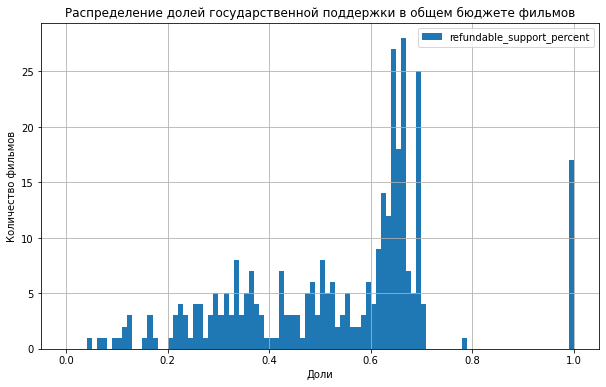

In [47]:
# построение диаграммы распределения долей гос.поддержки в бюджетах фильмов
ax = data.plot(
    kind='hist',
    y='refundable_support_percent',
    range=(0, 1),
    bins=100,
    title='Распределение долей государственной поддержки в общем бюджете фильмов',
    grid=True,
    figsize=(10, 6),
    #color='#336633'
)
ax.set_xlabel('Доли')
ax.set_ylabel('Количество фильмов')

In [48]:
# описательная статистика столбца 'refundable_support_percent'
data['refundable_support_percent'].describe()

count   332.000
mean      0.542
std       0.197
min       0.044
25%       0.385
50%       0.614
75%       0.661
max       1.000
Name: refundable_support_percent, dtype: float64

<div class="alert alert-block alert-info">В среднем государственная поддержка составляет 54%, но есть фильмы со 100% господдержкой. 
<p>75% рассматриваемых фильмов имеют долю государственной поддержки, не превышающую 66%</div>
<hr>

<div class="alert alert-block alert-info">* Продолжение удаления дубликатов в столбце title</div>

In [49]:
# в переменной l сохраним количество всех найденных значений в столбце title
l = data['title'].value_counts().reset_index()
# переименование столбцов
l.columns = ['title', 'count']
# список фильмов - возможных дубликатов (количество повторяющихся названий > 1)
list_duplicate_title = []
# заполнение списка 
for index, row in l.iterrows():
       if row['count'] > 1:
            list_duplicate_title.append(row['title'].strip())
            

In [50]:
sorted(list_duplicate_title)

['13 часов: Тайные солдаты Бенгази',
 '13-й район: Кирпичные особняки',
 'Weekend  (Уик-энд)',
 'Аватар',
 'Агент Джонни Инглиш: Перезагрузка',
 'Алиса в стране чудес /По книгам Льюиса Кэрролла "Алиса в стране чудес" и "Алиса в Зазеркалье"',
 'Альдабра: Путешествие по таинственному острову',
 'Американский пирог: Все в сборе',
 'Анархисты',
 'Ариэтти из страны лилипутов',
 'Арктика 3D',
 'Астрал. Глава 2',
 'Аэротачки',
 'Багровый пик',
 'Бегущий в лабиринте: Испытание огнем /По произведению Джеймса Дашнера',
 'Безумный Макс: Дорога ярости',
 'Белоснежка и Охотник 2',
 'Белоснежка и охотник',
 'Бен-Гур (2016)',
 'Близнецы',
 'Большая афера',
 'Большая игра',
 'Буду помнить',
 'Бунт ушастых',
 'В поисках Немо',
 'В тихом омуте',
 'Валентина',
 'Визит (2015)',
 'Виктор Франкенштейн',
 'Возмездие',
 'Волки / Wolves',
 'Волшебная страна',
 'Волшебный лес',
 'Воображариум доктора Парнаса',
 'Воскрешение',
 'Вторжение',
 'Вулкан страстей',
 'Выживший (2015)',
 'Выстрел',
 'Выше неба',
 'Гадк

In [51]:
# Функция удаления строк с одинаковыми столбцами
# title, type,  head_director, 'box_office', 'ratings'

def drop_title_duplicated(list_dt, data):
    # исходный размер датафрейма
    size_data = len(data)
    # цикл по списку названий возможных дубликатов
    for t in list_dt:
        # отбор дубликатов с одинаковым названием, сортировка по году - оставим более свежие записи
        part_df = data.query('title == @t').sort_values('year_start_date', ascending=False)
        
        # проверка совпадений по столбцам
        if len(part_df['type'].unique()) == 1 and len(part_df['head_director'].unique()) == 1\
        and len(part_df['main_genres'].unique()) == 1:            
            
            # средний рейтинг
            avg_rating = part_df['ratings'].mean()
            
            # вызов функции sum_uniq_val  для рассчета суммы по стобцу box_office
            sum_box_office = sum_uniq_val(part_df['box_office'])
            
            # список индексов для замены
            list_idx_replace = part_df.index.to_list()
            # замена всех значений стобца 'box_office' на сумму уникальных значений / общее число / Nan
            data.loc[list_idx_replace, 'box_office'] = sum_box_office
            # замена всех значений стобца 'ratings' на среднее значение
            data.loc[list_idx_replace, 'ratings'] = avg_rating

        # если нет полного совпадения - следующее название в списке дубликатов
        else:
            continue     

    # удаление дубликатов с сохранением новых значений в полях 'ratings' и 'box_office'
    data = data.drop_duplicates(subset=['title', 'type', 'head_director',\
                                         'box_office', 'ratings'])
    print(f'Удалено дубликатов: {size_data - len(data)}')
    return data
    

# функция суммирования неодинаковых значений столбца 
def sum_uniq_val(col):
    not_nan_value = np.array(col)
    # индексы nan-значений
    idx_nan_value = np.isnan(not_nan_value)
    # если в списке хотя бы один nan
    if len(idx_nan_value) > 0:
        # список без nan-значений
        not_nan_value = not_nan_value[~idx_nan_value]
        # если список не nan-значений не пустой
        if len(not_nan_value) > 0:
            sum_box_office = sum(set(not_nan_value))
        else:
            # если в списке только nan, сумма = nan
            sum_box_office = np.NaN
    # в списке не было nan
    else:
        # сумма различных числовых значений
        sum_box_office = sum(set(not_nan_value))
    return sum_box_office

# вызов функции и сохранение очищенного датафрейма
data = drop_title_duplicated(list_duplicate_title, data)

Удалено дубликатов: 214


In [52]:
data['title'].value_counts().head(10)

Волшебная страна    4
Прощание            4
Доброе утро         3
Она                 3
Король Лев          3
Вторжение           3
Успех               3
Глаз                2
Еще один год        2
Дар                 2
Name: title, dtype: int64

<div class="alert alert-block alert-info"> После применения функции, которая удалила 214 строк дубликатов, сохранив общую сумму box_office, средний рейтинг и свежий год релиза, остались еще строки-дубликаты, которые не попали в шаблон функции. Эти строки имеют одинаковое название, разные puNumber и одно или несколько отличий в столбцах head_director, production_country,short_age_restriction, type. Составим сводную таблицу для исследования таких фильмов.

In [53]:
# сводная таблица для поиска неявных дубликатов
duplicates_pt = data.pivot_table(index=['title'], \
                                 values=['puNumber', 'type', 'production_country','head_director', 'short_age_restriction'], \
                                 aggfunc=lambda x: x.value_counts().count())\
                    .sort_values(['puNumber'], ascending=False)
duplicates_pt.head(10)

,head_director,production_country,puNumber,short_age_restriction,type
title,,,,,
Прощание,4,3,4,2,1
Волшебная страна,3,3,4,3,2
Вторжение,3,3,3,3,2
Она,2,2,3,1,1
Успех,3,2,3,1,1
Король Лев,2,1,3,2,1
Доброе утро,3,3,3,2,1
В тихом омуте,2,2,2,2,1
Дар,2,1,2,2,1


<div class="alert alert-block alert-info">Если количество уникальных номеров фильмов совпадает хотя бы с одним из параметров, можно сделать вывод, что фильмы под таким названием - не дубликаты. Применим фильтр к оставшимся фильмам

In [54]:
# если puNumber - количество уникальных значений = хотя бы одному параметру - не дубликат
duplicates_pt.query('(puNumber != head_director and puNumber != production_country) and puNumber > 1').\
sort_values(['puNumber', 'short_age_restriction'], ascending=False)

,head_director,production_country,puNumber,short_age_restriction,type
title,,,,,
Волшебная страна,3,3,4,3,2
Король Лев,2,1,3,2,1
Она,2,2,3,1,1
Третий лишний,1,1,2,1,1
Схватка,1,1,2,1,1


<div class="alert alert-block alert-info">Осталось пять фильмов, обработку которых можно провети вручную

Обрабока дубикатов фильма "Волшебная страна"

In [55]:
data[data['title'].str.contains('Волшебная страна')]

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
104,Волшебная страна,221004716,2016-02-09,Художественный,филм колони,сша,ричард н.глэдстин,NaN,NaN,NaN,NaN,7.900,NaN,2016,12+,марк форстер,драма,NaN
873,Волшебная страна,124003016,2016-06-07,Анимационный,"брейктру филмз, эс эм бэ инвестментс",великобритания-польша-кнр-индия-норвегия,"магдалена баргел, хью велчман",NaN,NaN,NaN,NaN,7.900,0.004,2016,18+,мартин клэпп,драма,NaN
874,Волшебная страна,124001113,2013-04-15,Анимационный,"брейктру филмз, эс эм бэ инвестментс",великобритания-польша-кнр-индия-норвегия,"магдалена баргел, хью велчман",NaN,NaN,NaN,NaN,7.900,0.020,2013,18+,мартин клэпп,драма,NaN
1983,Волшебная страна,124000515,2015-02-05,Анимационный,чжэцзян чжунгнань анимэйшн,кнр,ву янронг,NaN,NaN,NaN,NaN,7.900,1.171,2015,6+,фанг лей,драма,NaN


In [56]:
data = data.drop(index=[873])

Обрабока дубикатов фильма "Король Лев", 446 и 517 - дубликаты, 6537 - другая студия

In [57]:
data[data['title'].str.contains('Король Лев')]

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
446,Король Лев,224008812,2012-03-27,Анимационный,"уолт дисней пикчерз, буена виста интернешнл",сша,дон хан,NaN,NaN,NaN,NaN,8.800,NaN,2012,0+,роб минкофф,мультфильм,NaN
517,Король Лев,124000412,2012-03-21,Анимационный,уолт дисней пикчерз,сша,дон хан,NaN,NaN,NaN,NaN,8.800,0.006,2012,0+,роб минкофф,мультфильм,NaN
6537,Король Лев,124004919,2019-07-15,Анимационный,"фэйрвью интертейнмент, уолт дисней пикчерс",сша,"джон фавро, карен гилкрайст, джеффри силвер",NaN,NaN,NaN,NaN,8.800,NaN,2019,6+,джон фавро,мультфильм,NaN


In [58]:
data = data.drop(index=[446])

Обрабока дубикатов фильма "Она", 1315 и  1316 - дубликаты

In [59]:
data.query('title == "Она"')

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
1315,Она,221033414,2014-08-20,Художественный,аннапурна пикчерз,сша,"меган эллисон, спайк джонс, винсент ландэйл",NaN,NaN,NaN,NaN,7.600,NaN,2014,16+,спайк джонс,мелодрама,NaN
1316,Она,121003414,2014-02-20,Художественный,аннапурна пикчерз,сша,"меган эллисон, спайк джонс, винсент ландэйл",NaN,NaN,NaN,NaN,7.600,0.013,2014,16+,спайк джонс,мелодрама,NaN
5063,Она,131000417,2017-11-30,Художественный,"астана филм фонд, астана банки, сатаифилм, каз...",казахстан,"эрнар курмашев, алия мендыгожина, акан сатаев",NaN,NaN,NaN,NaN,7.600,2.153,2017,16+,акан сатаев,мелодрама,NaN


In [60]:
data = data.drop(index=[1315])

Обрабока дубикатов фильма "Третий лишний", 987 и  988 - дубликаты

In [61]:
data[data['title'].str.contains('Третий лишний')]

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
987,Третий лишний,121016012,2012-07-06,Художественный,"юниверсал пикчерз, медиа райтс кэпитал, фаззи ...",сша,"джон джейкобс, джейсон кларк, сет макфарлейн",NaN,NaN,NaN,NaN,6.700,0.000,2012,16+,сет макфарлейн,комедия,NaN
988,Третий лишний,221077912,2012-12-11,Художественный,"юниверсал пикчерз, медиа райтс кэпитал, фаззи ...",сша,"джон джейкобс, джейсон кларк, сет макфарлейн",NaN,NaN,NaN,NaN,6.700,NaN,2012,16+,сет макфарлейн,комедия,NaN
2523,Третий лишний 2,121010115,2015-04-29,Художественный,"юниверсал пикчерз, медиа райтс кэпитал, фаззи ...",сша,"джон джейкобс, джейсон кларк, сет макфарлейн",NaN,NaN,NaN,NaN,5.900,310.969,2015,18+,сет макфарлейн,комедия,NaN


In [62]:
data = data.drop(index=[998])

Обрабока дубикатов фильма "Схватка", 433, 505, 506 - дубликаты

In [63]:
data[data['title'].str.contains('Схватка')]

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
433,Схватка _,221019512,2012-02-27,Художественный,"лиддел интертейнмент, скотт фри продакшнз, 198...",сша,"джо карнахан, ридли скотт, тони скотт",NaN,NaN,NaN,NaN,8.000,NaN,2012,16+,джо карнахан,триллер,NaN
505,Схватка,221003015,2015-02-11,Художественный,"лиддел интертейнмент, скотт фри продакшнз, 198...",сша,"джо карнахан, ридли скотт, тони скотт",NaN,NaN,NaN,NaN,8.000,NaN,2015,18+,джо карнахан,триллер,NaN
506,Схватка,121000312,2012-01-11,Художественный,"лиддел интертейнмент, скотт фри продакшнз, 198...",сша,"джо карнахан, ридли скотт, тони скотт",NaN,NaN,NaN,NaN,8.000,0.000,2012,18+,джо карнахан,триллер,NaN
1841,Схватка в пурге,111021314,2014-12-01,Художественный,"киностудия ""мосфильм""",ссср,unknown,NaN,NaN,NaN,NaN,6.300,NaN,2014,12+,а.гордон,боевик,NaN
1947,Схватка,211038914,2014-09-08,Художественный,одесская киностудия,ссср,unknown,NaN,NaN,NaN,NaN,8.000,NaN,2014,6+,с.пучинян,триллер,NaN


In [64]:
data = data.drop(index=[433])
data = data.drop(index=[505])

In [65]:
data.reset_index(drop=True).head()

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
0,Открытый простор,221048915,2015-11-27,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,"дэвид валдес, кевин костнер, джейк эбертс",NaN,NaN,NaN,NaN,7.200,NaN,2015,18+,кевин костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"киностудия ""мосфильм""",ссср,unknown,NaN,NaN,NaN,NaN,6.600,NaN,2016,6+,е.матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,"джим лемли, джейсон нетер, марк е.платт, яйн смит",NaN,NaN,NaN,NaN,6.800,NaN,2016,18+,тимур бекмамбетов,фантастика,NaN
3,Остановился поезд,111013816,2016-09-13,Художественный,"киностудия ""мосфильм""",ссср,unknown,NaN,NaN,NaN,NaN,7.700,NaN,2016,6+,в.абдрашитов,драма,NaN
4,Любовь и голуби,111007013,2013-10-18,Художественный,"киностудия ""мосфильм""",ссср,unknown,NaN,NaN,NaN,NaN,8.300,0.003,2013,12+,в.меньшов,мелодрама,NaN


In [66]:
# проверка количества удаленных данных в датафрейме
print('Удалено данных в качестве дубликатов {:.2%}'.format(1 - len(data) / 7486))

Удалено данных в качестве дубликатов 9.55%


<div class="alert alert-block alert-info"><b>Вывод:</b>
    <p><i>2.1 Типы данных изменены в столбцах:</i>
<p>show_start_date преобразуем дату в формат '%Y-%m-%d'
<p>refundable_suppor, nonrefundable_support, budget, box_office - выразим в млн. рублей
 <p>ratings тип данных object преобразован во float64, удалены знаки %, значения, большие 10, уменьшены в 10 раз
<p>age_restriction – переведен в краткий формат «0+», «12+» и т.д.
<br>
<p><i>2.2 Пропуски заполнены в столбцах:</i>
<p>• production_country – вручную
<p>• director, producer – замены на unknown
<p>• ratings – после создания столбца main_genres, заполнены медианным значением по жанрам
<p> Пропуски не были заполнены в следующих столбцах:
<p>•  genres - по типу фильма сложно понять его жанр, продюссеры могут вкладываться в фильмы разных жанров
<p>•  box_office - фильм мог не выходить в широкий прокат
<p>•  refundable_support, nonrefundable_support, budget, financing_source - заполнены только для фильмов с господдержкой

<p><i>2.3 Дубликаты в датафрейме:</i>
<p>Основное поле поиска дубликатов  - в названии фильмов. Удаление дубликатов происходило в четыре этапа:
<p>1.	Обработка названий фильмов (удаление лишних пробелов и других мусорных символов в конце)
<p>2.	С использованием drop_duplicates() были удалены строки совпадающие по полям title', 'type', 'production_country',   'producer','short_age_restriction', 'box_office'
<p>3.	После добавления новых уточняющих столбцов в разделе 2.6 проведен третий этап удаления дубликатов:  теперь совпадения искались функцией drop_title_duplicated только по полям title, type,  head_director, main_genres, если совпадение было найдено по всем трем полям, дубликаты удалялись, оставив накопительную сумму (одну и ту же сумму, Nan) по сборам и средний рейтинг в случае их отличия (дополнительная функция sum_uniq_val). На этом шаге было удалено 213 дубликатов
<p>4.	Завершающий этап «чистки» был реализован при помощи фильтра по сводной таблице, оставшиеся пять явных дубликатов анализировались и удалялись вручную
    <br>
<p><i>2.4  Обработка столбцов</i> 'type', 'film_studio', 'production_country', 'director', 'producer' - удаление пробелов в начале / конце строк
<p><i>2.5  Нулевой бюджет</i> при наличии любой поддержки - является ошибкой, заполним такие значения на сумму столбцов refundable_support и nonrefundable_support
<p><i>2.6  Добавлены новые столбцы</i> 'year_start_date', 'head_director', 'main_genres'
<p>Рассчитана доля государственной поддержки от общего бюджета фильма. В среднем государственная поддержка составляет 54%, но есть фильмы со 100% господдержкой.
75% рассматриваемых фильмов имеют долю государственной поддержки, не превышающую 66%




### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [67]:
# фильтр данных с ненулевыми сборами
movie_in_release = data.query('box_office > 0')

# сводная таблица сборы / количество фильмов по годам
movie_in_release_pt = movie_in_release.pivot_table(index='year_start_date', values=['box_office','puNumber'], \
                                                aggfunc={'box_office': 'sum', 'puNumber':'count'}).reset_index()
# переименование столбцов
movie_in_release_pt.columns=['year_of_realease','box_office_release','total_movies_in_realease']
# вывод таблицы
movie_in_release_pt

,year_of_realease,box_office_release,total_movies_in_realease
0,2010,2.161,92
1,2011,13.956,100
2,2012,7.276,118
3,2013,29.834,178
4,2014,7373.921,259
5,2015,35614.539,447
6,2016,51820.212,545
7,2017,48563.707,357
8,2018,49668.403,475
9,2019,48425.709,530


In [68]:
# сводная таблица по всем фильмам для расчета количества фильмов, выпущенных в каждом году
movie_in_year_pt = data.pivot_table(index = 'year_start_date', values='puNumber', \
                                    aggfunc='count').reset_index()
# переименование столбцов
movie_in_year_pt.columns=['year_of_realease','total_movies']

# вывод объединенной таблицы 
movie_in_year_pt = movie_in_year_pt.merge(movie_in_release_pt, how='left')
movie_in_year_pt['percent'] = movie_in_year_pt['total_movies_in_realease'] / movie_in_year_pt['total_movies']
movie_in_year_pt

,year_of_realease,total_movies,box_office_release,total_movies_in_realease,percent
0,2010,757,2.161,92,0.122
1,2011,471,13.956,100,0.212
2,2012,516,7.276,118,0.229
3,2013,588,29.834,178,0.303
4,2014,722,7373.921,259,0.359
5,2015,659,35614.539,447,0.678
6,2016,765,51820.212,545,0.712
7,2017,500,48563.707,357,0.714
8,2018,881,49668.403,475,0.539
9,2019,912,48425.709,530,0.581


Text(0, 0.5, 'Доли')

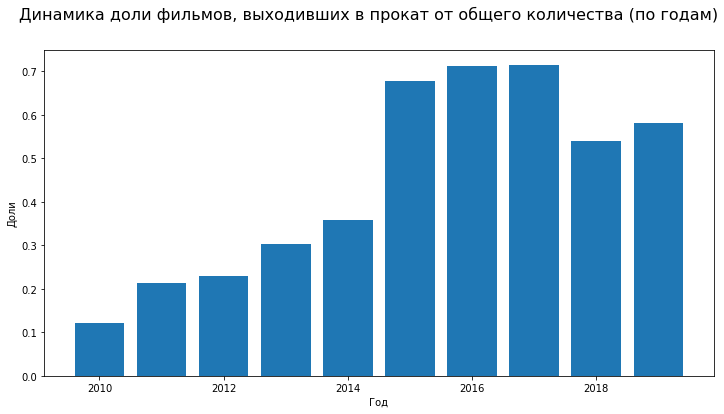

In [69]:
# построение сводного графика доли фильмов вышедших в прокат от общего количества фильмов за каждый год
import matplotlib.pyplot as plt
x = movie_in_year_pt['year_of_realease']
y = movie_in_year_pt['percent']
fig, ax = plt.subplots()

ax.bar(x, y)
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"


fig.suptitle('Динамика доли фильмов, выходивших в прокат от общего количества (по годам)', fontsize=16)
ax.set_xlabel('Год')
ax.set_ylabel('Доли')

In [70]:
# доля фильмов, вышедших в прокат за всё время
data['box_office'].count() / data['year_start_date'].count()

0.46152710087136317

<div class="alert alert-block alert-info">Наименьшая доля фильмов (12.2% от общего количества) вышла в релиз в 2010, наибольшая (71%) - в 2016 и 2017 годах. Доля фильмов, вышедших в прокат за всё время составляет 46%

<hr>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'Сборы, млн. руб.')

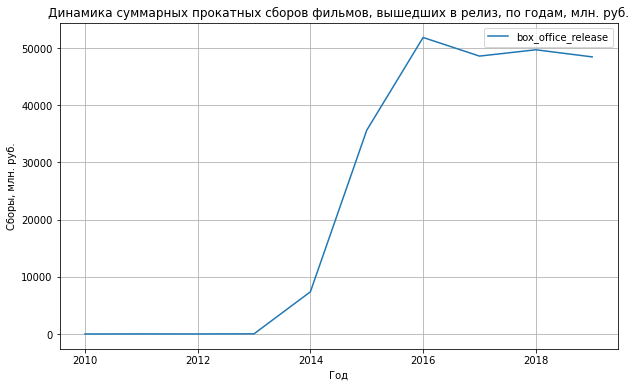

In [71]:
# построения графика динамики сборов у фильмов, вышедших в релиз
ax = movie_in_release_pt.plot(
    x='year_of_realease', 
    y='box_office_release',
    title='Динамика суммарных прокатных сборов фильмов, вышедших в релиз, по годам, млн. руб.',
    grid=True,
    figsize=(10, 6)
    )
ax.set_xlabel('Год')
ax.set_ylabel('Сборы, млн. руб.')


In [72]:
# максимальные и минимальные годовые сборы у фильмов с релизом
max_total_box_office = movie_in_release_pt['box_office_release'].max()
min_total_box_office = movie_in_release_pt['box_office_release'].min()

In [73]:
movie_in_release_pt.query('box_office_release == @max_total_box_office')

,year_of_realease,box_office_release,total_movies_in_realease
6,2016,51820.212,545


In [74]:
movie_in_release_pt.query('box_office_release == @min_total_box_office')

,year_of_realease,box_office_release,total_movies_in_realease
0,2010,2.161,92


In [75]:
movie_in_release.sort_values('box_office', ascending=False). head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
6961,Холоп,111021719,2019-12-19,Художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",25.000,35.000,160.000,Фонд кино,6.800,3073.569,2019,12+,к.шипенко,комедия,0.375
5163,Движение вверх,111011817,2017-12-21,Художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,"л.верещагин, а.златопольский, н.михалков, ооо ...",0.000,400.000,590.192,Фонд кино,7.500,2779.686,2017,6+,а.мегердичев,спорт,0.678
6325,Мстители: Финал,121005519,2019-04-29,Художественный,марвел студиос,сша,кевин фейги,NaN,NaN,NaN,NaN,7.600,2576.614,2019,16+,джо руссо,фантастика,NaN


<div class="alert alert-block alert-info">В 2014 году по сравнению с 2013 годом сборы увеличились в 247 раз и составили 7373.92 млн. руб. против 29.83 млн. рублей. Это можно объяснить выходом таких успешных фильмов, как "Мстители: Финал" (США) или "Холоп" и "Движение вверх" (Россия).
<p>Минимальные сборы были собраны в 2010 году и составили 2.16 млн. руб., а максимальные - в 2016 году и составили 51820.21 млн. руб.</div>

<hr>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [76]:
# сводная таблица для медианной и средней суммы сборов
box_office_median_and_mean = movie_in_release.pivot_table(index='year_start_date', values=['box_office'], \
                                                aggfunc=['median', 'mean']).reset_index()
# переименование столбцов
box_office_median_and_mean.columns = ['year_of_realease', 'box_office_median', 'box_office_mean']
# вывод таблицы
box_office_median_and_mean 

,year_of_realease,box_office_median,box_office_mean
0,2010,0.002,0.023
1,2011,0.003,0.140
2,2012,0.007,0.062
3,2013,0.004,0.168
4,2014,0.022,28.471
5,2015,4.569,79.675
6,2016,4.610,95.083
7,2017,9.968,136.033
8,2018,8.891,104.565
9,2019,4.628,91.369


Text(0.5, 0, 'Год релиза фильма')

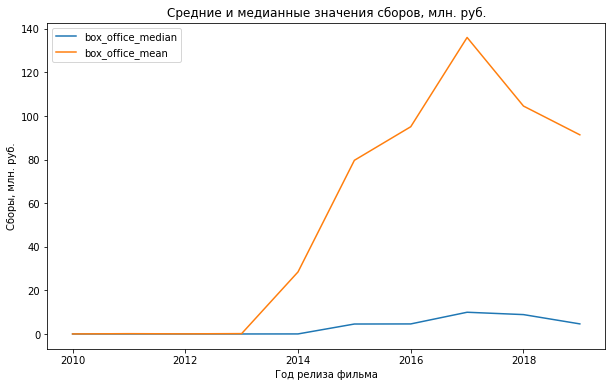

In [77]:
# построение графика медианных и средних значений сборов
ax = box_office_median_and_mean.plot(
    x='year_of_realease', 
    figsize=(10, 6), 
    title='Средние и медианные значения сборов, млн. руб.')
# переименование оси у
ax.set_ylabel('Сборы, млн. руб.')
ax.set_xlabel('Год релиза фильма')

<div class="alert alert-block alert-info">На графике хорошо видно, насколько значительно отличаются средний и медианные показатели сборов фильмов, вышедших в релиз (в некоторые годы отличие составляет более, чем в 11 раз). Среднее значение слишком чувствительно к выбросам, а для выборки по денежным сборам такие выбросы встречаются часто: какие фильмы собирают миллионы рублей, какие-то несколько тысяч или вообще не получают широкого проката.

<hr>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [78]:
# фильтр по годам
age_restriction_effect = data.query('year_start_date in (2015, 2016, 2017)')
# сводная таблица - суммарные сборы по возрастным ограничениям
age_restriction_effect.pivot_table(index='short_age_restriction', values='box_office', aggfunc='sum')\
                     .sort_values('box_office')

,box_office
short_age_restriction,
0+,774.827
18+,21881.222
6+,32841.230
12+,33722.951
16+,46778.228


<div class="alert alert-block alert-info">Больше всего денег в прокате собрали фильмы категории "16+" - 46778,228 млн. руб.

In [79]:
# сводная таблица  с разбивкой кассовых сборов по годам и возрастным ограничениям
pt_age = age_restriction_effect.pivot_table(index=['short_age_restriction','year_start_date'], \
                                   values='box_office', aggfunc='sum').reset_index()
pt_age

,short_age_restriction,year_start_date,box_office
0,0+,2015,303.950
1,0+,2016,241.278
2,0+,2017,229.599
3,12+,2015,12008.208
4,12+,2016,13863.315
5,12+,2017,7851.428
6,16+,2015,10907.982
7,16+,2016,17125.204
8,16+,2017,18745.043
9,18+,2015,3980.471


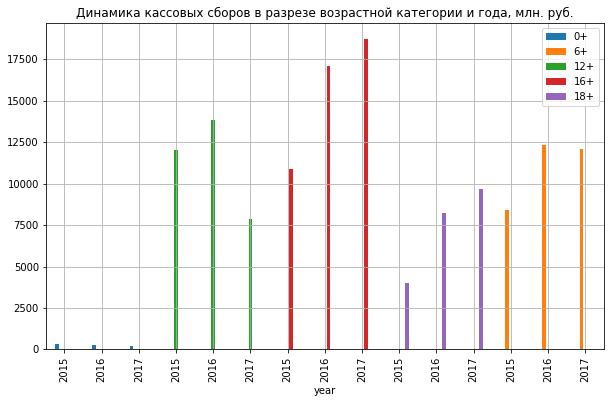

In [80]:
# данные для построения диаграммы
diag_age = {'0+': pt_age.iloc[0:3, 2], '6+': pt_age.iloc[12:, 2], '12+': pt_age.iloc[3:6, 2], '16+': pt_age.iloc[6:9, 2], \
           '18+': pt_age.iloc[9:12, 2]}
diag_age = pd.DataFrame(diag_age)
diag_age['year']  = pt_age['year_start_date']
ax = diag_age.plot(
        kind='bar', 
        x='year', 
        grid=True, 
        figsize=(10, 6), 
        title='Динамика кассовых сборов в разрезе возрастной категории и года, млн. руб.'
) 

<div class="alert alert-block alert-info">По диаграмме можно сделать вывод, что каждый год есть рост кассовых сборов в каждой категории, кроме 0+ и 12+

In [81]:
# сводная таблица - всего фильмов и сборы по годам и возрастным ограничениям
pt = age_restriction_effect.pivot_table(index=['year_start_date', 'short_age_restriction'], \
                                   values=['puNumber', 'box_office'], \
                                   aggfunc={'puNumber':'count', 'box_office': ['sum', 'median', 'mean']})
pt.columns = ['box_office_mean','box_office_median','box_office_total', 'total_movies']
pt

box_office_mean  box_office_median  \
year_start_date short_age_restriction                                       
2015            0+                               8.215              2.956   
                12+                            164.496             15.352   
                16+                             67.333              4.301   
                18+                             31.097              3.973   
                6+                             168.279             19.513   
2016            0+                               6.032              2.880   
                12+                            167.028              4.845   
                16+                             90.610              5.381   
                18+                             50.921              7.868   
                6+                             171.405              3.698   
2017            0+                              76.533             22.179   
                12+                            191.498              9.011   
                16+                            154.918              9.702   
                18+                             65.656              8.213   
                6+                             268.581             51.992   

                                       box_office_total  total_movies  
year_start_date short_age_restriction                                  
2015            0+                              303.950            47  
                12+                           12008.208           135  
                16+                           10907.982           235  
                18+                            3980.471           169  
                6+                             8413.928            73  
2016            0+                              241.278            66  
                12+                           13863.315           131  
                16+                           17125.204           246  
                18+                            8249.256           229  
                6+                            12341.160            93  
2017            0+                              229.599            44  
                12+                            7851.428            68  
                16+                           18745.043           152  
                18+                            9651.496           170  
                6+                            12086.142            66

In [82]:
# данные для диаграммы
pt = pt.reset_index()
pt['percent'] = ''
pt.iloc[0:5, -1] = pt.iloc[0:5, 5] / sum(pt.iloc[0:5, 5])
pt.iloc[5:10, -1] = pt.iloc[5:10, 5] / sum(pt.iloc[5:10, 5])
pt.iloc[10:, -1] = pt.iloc[10:, 5] / sum(pt.iloc[10:, 5])
pt = pt.sort_values('short_age_restriction')

In [84]:
age_restriction_effect.query('year_start_date == 2015').sort_values('box_office', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
2422,Миньоны,124001715,2015-03-30,Анимационный,иллюминейшн интертейнмент,сша,"кристофер меледандри, джанет хили",NaN,NaN,NaN,NaN,6.200,1646.581,2015,6+,кайл балда,мультфильм,NaN
2022,Мстители: Эра Альтрона,121007215,2015-04-03,Художественный,марвел студиос,сша,кевин фейги,NaN,NaN,NaN,NaN,7.200,1500.989,2015,12+,джосс уидон,фантастика,NaN
1968,Форсаж 7,221022915,2015-06-23,Художественный,"юниверсал пикчерз, релятивити медиа, дентсу, ф...",сша,"вин дизель, майкл фоттрел",NaN,NaN,NaN,NaN,7.000,1486.131,2015,16+,джеймс ван,боевик,NaN
2423,Мир Юрского периода,121006515,2015-04-03,Художественный,"эмблин интертейнмент, леджендари пикчерз, юнив...",сша,"патрик краули, фрэнк маршалл",NaN,NaN,NaN,NaN,6.900,1211.159,2015,12+,колин треворроу,фантастика,NaN
2354,Терминатор: Генезис,121012415,2015-06-11,Художественный,"парамаунт пикчерз, скайдэнс продакшнз",сша,"дэвид эллисон, дэна голдберг",NaN,NaN,NaN,NaN,6.400,1060.054,2015,12+,алан тэйлор,фантастика,NaN


<div class="alert alert-block alert-info">
    <p>Возрастное ограничение аудитории влияет на кассовые сборы в контексте количества выпускаемых фильмов для каждой категории. Наибольшие сборы с 2015 по 2017 принесли фильмы с возрастным ограничением "16+" (46778.23 млн. руб.).
    <p> Рассматривая каждую возрастную категорию по отдельности, можно отметить, что кассовые сборы для категорий "6+", "16+", "18+" каждый год показывали повышение кассовых сборов, тогда как в категория "0+" и "12+" - было падение. Это связано с количеством выпускаемых фильмов (для категории "0+" доля составляет в среднем 8% от общего количества, а для категории "12+" произошло снижение с 20,5% в 2015 году до 13,6% в 2017)
     <p> В 2015 году категория "12+" стала лидером по кассовым сборам, это связано с выходом таких популярных фильмов, как "Мстители: Эра Альтрона", "Мир Юрского периода" и др., а так же мультфильма "Миньоны" ("0+") - лидера проката, который могли посещать и дети из категории "12+"
</div>

<div class="alert alert-block alert-info"><b>Вывод:</b>
    <p>
Доля фильмов, вышедших в прокат за всё время составляет 46%
 <p>Минимальные сборы были собраны в 2010 году и составили 2.16 млн. руб., а максимальные - в 2016 году и составили 51820.21 млн. руб.
 <p>Средние и медианные показатели сборов фильмов, вышедших в релиз в некоторые годы отличаются более чем в 11 раз
 <p>Возрастное ограничение аудитории влияет на кассовые сборы в контексте количества выпускаемых фильмов для каждой категории. Наибольшие сборы с 2015 по 2017 принесли фильмы с возрастным ограничением "16+" (46778.23 млн. руб.).




### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<div class="alert alert-block alert-info">Отфильтруем данные по столбцу budget, рассматривать будем фильмы с ненулевым и непустым бюджетом. Затем построим сводную таблицу с медианными бюджетом, доли участия государства в бюджете фильма и рейтингом по годам

In [85]:
# фильтр по столбцу budget  - значения без Nan
movies_support = data.query('budget == budget')

In [86]:
# фильмы с господдержкой: медианный бюджет по годам, медианная доля участия гос-ва в бюджете фильма, медианный рейтинг
movies_support_x = movies_support.groupby('year_start_date')\
                    ['budget', 'refundable_support_percent', 'ratings', 'box_office'].median()
# доля окупаемости: кассовые сборы относительно бюджета
movies_support_x['payback'] = movies_support_x['box_office'] / movies_support_x['budget']
movies_support_x

,budget,refundable_support_percent,ratings,box_office,payback
year_start_date,,,,,
2013,127.718,0.473,6.700,10.161,0.080
2014,51.197,0.625,6.350,4.731,0.092
2015,57.494,0.624,6.200,9.201,0.160
2016,69.883,0.640,5.800,17.921,0.256
2017,78.096,0.525,6.200,50.452,0.646
2018,90.325,0.594,6.200,27.023,0.299
2019,78.422,0.583,6.200,27.853,0.355


<div class="alert alert-block alert-info">Можно заметить, что медианная доля окупаемости (столбец 'payback') - очень низкая (от 8% до 64%). Вероятно, и обычные фильмы, вышедшие в релиз могут не иметь 100% окупаемости, а фильмы с государственной поддержкой тут отличий имеют не много. Медианный рейтинг колеблется от 6.1 до 6.7, а медианная доля господдержки в бюджете фильмов от 47% до 64%.
    <p>Выше уже упоминалось, что существуют фильмы со 100% господдержкой, рассмотрим их детально

In [87]:
# 100% господдержка
movies_full_support = movies_support.query('refundable_support_percent == 1')
# медианные значения бюджета, рейтинга, сборов 
movies_full_support = movies_full_support.groupby('year_start_date')['budget', 'ratings', 'box_office'].median()
# доля окупаемости: кассовые сборы относительно бюджета
movies_full_support['payback'] = movies_full_support['box_office'] / movies_full_support['budget']
movies_full_support

,budget,ratings,box_office,payback
year_start_date,,,,
2014,23.000,6.600,10.234,0.445
2015,67.000,6.250,128.713,1.921
2016,70.000,5.600,70.299,1.004
2017,42.500,5.000,52.780,1.242
2018,75.000,5.200,94.940,1.266
2019,180.000,6.200,147.607,0.820


In [88]:
len(movies_full_support)

6

<div class="alert alert-block alert-info">Фильмы со 100% господдержкой имеют меньший медианный рейтинг, но при этом у них наблюдается практически полная с плюсом окупаемость в 2015-2018 годах, самая низкая окупаемость приходится на 2014 год. Однако таких фильмов всего шесть и показывать какую-то статистическую закономерность они не могут</div>

In [89]:
# Три фильма с наибольшими кассовыми сборами
movies_support.sort_values('box_office', ascending=False).head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
6961,Холоп,111021719,2019-12-19,Художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",25.000,35.000,160.000,Фонд кино,6.800,3073.569,2019,12+,к.шипенко,комедия,0.375
5163,Движение вверх,111011817,2017-12-21,Художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,"л.верещагин, а.златопольский, н.михалков, ооо ...",0.000,400.000,590.192,Фонд кино,7.500,2779.686,2017,6+,а.мегердичев,спорт,0.678
6055,Т-34,111024918,2018-12-21,Художественный,"ооо ""кинокомпания марс-фильм"" по заказу ооо ""м...",россия,"а.златопольский, р.дишдишян, л.блаватник, н.яр...",60.000,120.000,563.785,Фонд кино,6.500,2271.754,2018,12+,а.сидоров,драма,0.319


In [90]:
# Три фильма с наибольшим бюджетом
movies_support.sort_values('budget', ascending=False).head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,producer,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_start_date,short_age_restriction,head_director,main_genres,refundable_support_percent
6619,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...",россия-китай,"с.сельянов, а.петрухин",180.000,90.000,2305.074,Фонд кино,5.800,333.597,2019,6+,о.степченко,приключения,0.117
4947,Матильда,111005717,2017-08-17,Художественный,"ооо ""тпо ""рок"", ооо ""матильда""",россия,"а.учитель, а.достман, в.винокур",110.000,190.000,1032.906,Фонд кино,7.700,511.776,2017,16+,а.учитель,фэнтези,0.290
6969,Союз спасения,111022019,2019-12-26,Художественный,"зао ""дирекция кино""",россия,"а.максимов, к.эрнст",100.000,400.000,980.000,Фонд кино,6.000,717.703,2019,12+,а.кравчук,история,0.510


In [91]:
# коэффициент корреляции
movies_support['budget'].corr(movies_support['box_office'])

0.37592143338588285

In [92]:
# источники финансирования 
financing_source_support = movies_support.pivot_table(index='financing_source', \
                                                      values=['budget', 'box_office', 'ratings', 'puNumber'],\
                          aggfunc={'budget': 'median', 'box_office': 'median', 'ratings': 'median', 'puNumber':'count'})
financing_source_support.columns=['median_box_office', 'median_budget', 'total_movies', 'median_ratings']
financing_source_support['percent'] = financing_source_support['total_movies'] / sum(financing_source_support['total_movies'])
financing_source_support.sort_values('total_movies', ascending=False)

,median_box_office,median_budget,total_movies,median_ratings,percent
financing_source,,,,,
Министерство культуры,1.761,48.571,163,6.200,0.494
Фонд кино,85.888,136.163,146,6.000,0.442
"Министерство культуры, Фонд кино",8.425,70.086,21,6.500,0.064


<div class="alert alert-block alert-info">Основными источниками финансирования фильмов с господдержкой являются Министерство культуры и Фонд кино. Доля финансирования Министерства культуры 49.4%, Фонда кино - 42.2%, их совместные проекты составляют 6.4%.
    <p>При практически равном участии, медианный бюджет Министерства культуры 48.6 млн. руб., а медианные сборы - 1.8 млн. руб. - в 27 раз меньше, тогда как у Фонда кино миданный бюджет фильма 136.2 млн. руб., а медианные сборы в 1.5 раза меньше бюджета (85.9 млн. руб.).
        Это объясняется достаточно просто: не все проекты Министерства культуры выходят в широкий прокат и чаще всего носят благотворительный или малобюджетный характер. Фонд кино чаще всего финансирует фильмы для широкого проката, как для ТВ, так и в кинотеатрах.

In [93]:
# сравнение рейтингов фильмов с господдержкой и без
data_ratings = data.query('budget != budget')
ratings_pt = data_ratings.pivot_table(index='main_genres', values='ratings', aggfunc='median')
ratings_with_support_pt = movies_support.pivot_table(index='main_genres', values='ratings', aggfunc='median')
ratings_with_support_merge = ratings_with_support_pt.merge(ratings_pt, on='main_genres', how='outer')
ratings_with_support_merge.columns = ['median_ratings_with_support', 'median_ratings_without_support']
ratings_with_support_merge

,median_ratings_with_support,median_ratings_without_support
main_genres,,
биография,6.900,6.900
боевик,6.450,6.600
военный,6.400,6.650
детектив,6.800,6.700
детский,7.250,7.200
драма,6.400,6.800
история,5.900,6.550
комедия,5.750,6.200
криминал,7.800,6.600


<div class="alert alert-block alert-info">Составив таблицу сравнения рейтингов фильмов с гос.участием и без по жанрам, можно увидеть, что фильмы в жанрах аниме, вестерн, для взрослых и др. - не получали государственного финансирования.

<AxesSubplot:title={'center':'Сравнение рейтингов по жанрам для фильмов с гос. участием и без'}, xlabel='main_genres'>

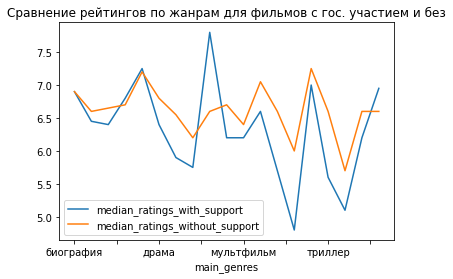

In [94]:
ratings_with_support_merge_x = ratings_with_support_pt.merge(ratings_pt, on='main_genres', how='inner')
ratings_with_support_merge_x.columns = ['median_ratings_with_support', 'median_ratings_without_support']
ratings_with_support_merge_x.plot(title='Сравнение рейтингов по жанрам для фильмов с гос. участием и без')

In [95]:
ratings_with_support_merge_x.query('median_ratings_with_support > median_ratings_without_support')

,median_ratings_with_support,median_ratings_without_support
main_genres,,
детектив,6.800,6.700
детский,7.250,7.200
криминал,7.800,6.600
фэнтези,6.950,6.600


<div class="alert alert-block alert-info">По графику видно, что в целом рейтинг фильмов, финансируемых государством ниже, чем рейтинг фильмов по таким же жанрам, но без государственного участия, за исключением жанров "криминал", "детектив", "фэнтези" и "детский"

<div class="alert alert-block alert-info">Три фильма с наибольшими кассовыми сборами и господдержкой: 
    <li>"Холоп" (господдержка 37.5%, окупаемость превысила бюджет в 19 раз, рейтинг 6.8) 
    <li>"Движение вверх" (господдержка 67.8%, окупаемость превысила бюджет в 4 раза, рейтинг 7.5)
    <li>"Т-34" (господдержка 31.9%, окупаемость превысила бюджет в 4 раза, рейтинг 6.5)
<p>Три фильма с наибольшим бюджетом и господдержкой: 
    <li>"Тайна Печати Дракона" (господдержка 11.7%, кассовые сборы в 7 раз меньше бюджета, рейтинг 5.8) 
    <li>"Матильда" (господдержка 29%, кассовые сборы в 2 раз меньше бюджета, рейтинг 7.7)
    <li>"Союз спасения" (господдержка 51%, кассовые сборы в 1.4 раза меньше бюджета, рейтинг 6)
<br>
        <p> Если посмотреть на коэффициент корреляции между бюджетом фильма и кассовыми сборами, то он составляет 37.6%, что говорит о слабой связи между этими параметрами: не всегда огромный бюджет будет означать успех фильма и такие же огромные сборы.
           <p>Основными источниками финансирования фильмов с господдержкой являются Министерство культуры и Фонд кино. Доля финансирования Министерства культуры 49.4%, Фонда кино - 42.2%, их совместные проекты составляют 6.4%.
               <p>В целом рейтинг фильмов, финансируемых государством ниже, чем рейтинг фильмов по таким же жанрам, но без государственного участия

<div class="alert alert-block alert-info"><b>Вывод:</b>
    <p>
Медианная доля окупаемости от 8% до 64%. Медианный рейтинг колеблется от 6.1 до 6.7, а медианная доля господдержки в бюджете фильмов от 47% до 64%.
  <p>Фильмы со 100% господдержкой чаще всего окупаются и приносят доход (таких фильмов нашлось шесть)
  <p>Три фильма с наибольшими кассовыми сборами и господдержкой: "Холоп», «Движение вверх", "Т-34"
   <p>Коэффициент корреляции между бюджетом фильма и кассовыми сборами составляет 37.6%, что говорит о слабой связи между этими параметрами.
       <p>Основными источниками финансирования фильмов с господдержкой являются Министерство культуры (49.4%) и Фонд кино (42.2%)  и их совместная деятельность (6.4%)
          <p> Рейтинга фильмов, финансируемых государством ниже, чем рейтинг фильмов по таким же жанрам, но без государственного участия (кроме жанров "криминал", "детектив", "фэнтези" и "детский") 





### Шаг 5. Напишите общий вывод

<div class="alert alert-block alert-info"><b>Предобработка данных</b>
    <p>Рассматриваемый датафрейм был получен после объединения файлов с данными по полю puNumber, который был приведен к одинаковому типу в разных датасетах
<p>Преобразованы типы данных и формат в столбцах show_start_date, refundable_suppor, nonrefundable_support, budget, box_office, ratings, age_restriction
<p>Пропуски заполнены в столбцах production_country, director, producer, ratings. 
<p>Основное поле поиска дубликатов - в названии фильмов title. Удаление дубликатов происходило в несколько этапов: от применения функции drop_duplicates(), реализации собственной функции поиска и удаления дубликатов drop_title_duplicated до удаления нешаблонных дубликатов вручную (таких данных обработано в количестве 5 строк). После удаления дубликатов размер датафрейма уменьшился на 9,54%
<p>Категориальные столбцы обработаны на наличие посторонних символов в начале и конце строк.
<p>Нулевой бюджет при наличии любой поддержки заполнен  на сумму столбцов refundable_support и nonrefundable_support.
<p>Добавлены новые столбцы 'year_start_date', 'head_director', 'main_genres'.
<p>Рассчитана доля государственной поддержки от общего бюджета фильма. В среднем государственная поддержка составляет 54%, но есть фильмы со 100% господдержкой. 75% рассматриваемых фильмов имеют долю государственной поддержки, не превышающую 66%
<br>
    <b><p>Результаты исследовательского анализа данных:</b>
<li>Доля фильмов, вышедших в прокат за всё время составляет 46%
<li>Минимальные сборы были собраны в 2010 году и составили 2.16 млн. руб., а максимальные - в 2016 году и составили 51820.21 млн. руб.
<li>Средние и медианные показатели сборов фильмов, вышедших в релиз в некоторые годы отличаются более чем в 11 раз
<li>Возрастное ограничение аудитории влияет на кассовые сборы в контексте количества выпускаемых фильмов для каждой категории. Наибольшие сборы с 2015 по 2017 принесли фильмы с возрастным ограничением "16+" (46778.23 млн. руб.).

<b><p>Исследовательский анализ данных фильмов, имеющих государственную поддержку</b>, показал, что медианная доля окупаемости от 8% до 64%, медианный рейтинг колеблется от 6.1 до 6.7, а медианная доля господдержки в бюджете фильмов составляет от 47% до 64%.
<p>Фильмы со 100% господдержкой чаще всего окупаются и приносят доход (таких фильмов нашлось шесть) 
 <p>Коэффициент корреляции между бюджетом фильма и кассовыми сборами составляет 37.6%, что говорит о слабой связи между этими параметрами
       <p>Основными источниками финансирования фильмов с господдержкой являются Министерство культуры (49.4%) и Фонд кино (42.2%)  и их совместная деятельность (6.4%)
          <p> Рейтинга фильмов, финансируемых государством ниже, чем рейтинг фильмов по таким же жанрам, но без государственного участия (кроме жанров "криминал", "детектив", "фэнтези" и "детский") </div>


